In [1]:
# !python3 --version
# !pip --version
# !pip install xgboost
# !pip install catboost
# !pip install pyforest
# !pip install --upgrade category_encoders
# !pip install lightgbm

# Добавление нужных библиотек

In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import datetime
warnings.filterwarnings('ignore')

# 0. Загрузка исходных данных

In [3]:
location = pd.read_csv('LOCATION.csv', delimiter=';')

product = pd.read_csv('PRODUCT.csv', delimiter=';')

ss = pd.read_csv('sample_submission.csv')

test = pd.read_csv('test.csv')

train = pd.read_csv('train.csv')

In [4]:
location

,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,280,211,211,12,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,281,221,221,3,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1482,227,227,2,1,NaN,NaN,30Nov2019:03:40:21,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1204,1483,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1205,1484,24,24,11,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1206,1485,124,124,19,1,NaN,NaN,28Dec2019:10:4

In [5]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   STORE_LOCATION_RK                 1208 non-null   int64  
 1   STORE_LOCATION_LVL_RK4            1208 non-null   int64  
 2   STORE_LOCATION_LVL_RK3            1208 non-null   int64  
 3   STORE_LOCATION_LVL_RK2            1208 non-null   int64  
 4   STORE_LOCATION_LVL_RK1            1208 non-null   int64  
 5   STORE_OPEN_DTTM                   0 non-null      float64
 6   STORE_CLOSURE_DTTM                0 non-null      float64
 7   VALID_FROM_DTTM                   1208 non-null   object 
 8   VALID_TO_DTTM                     1208 non-null   object 
 9   PROCESSED_DTTM                    1208 non-null   object 
 10  STORE_LOCATION_ADK_hashing        1208 non-null   object 
 11  STORE_LOCATION_ID_hashing         1208 non-null   object 
 12  STORE_

In [6]:
product

,PRODUCT_RK,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,PRODUCT_LVL_RK1,SALES_INTRODUCTION_DT,SALES_DISCONTINUED_DT,VALID_FROM_DTTM,...,PRODUCT_ATTRIB23_hashing,PRODUCT_ATTRIB24_hashing,PRODUCT_ATTRIB25_hashing,PRODUCT_ATTRIB26_hashing,PRODUCT_ATTRIB27_hashing,PRODUCT_ATTRIB28_hashing,PRODUCT_ATTRIB29_hashing,PRODUCT_ATTRIB30_hashing,PRODUCT_ATTRIB31_hashing,PRODUCT_TYPE_CD_hashing
0,11316,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
1,11317,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
2,11318,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
3,11319,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
4,11320,10224,10198,113533,10125,9711,1,NaN,NaN,15Mar2018:14:08:14,...,3797D379D4D05BB733CA37EDFE74A29C,CE6E6B615231B052EF75AEDBED6491A5,325EAF17AD4FAE4A0B943066EF60BED1,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171603,191028,190706,6196,113158,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,B748B7A8EE4559D5BA632F0F079BDAC7,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171604,191029,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171605,191030,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,E0A3AAA77B50DDD3A67C3118EA559F6A,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,41B394758330C83757856AA482C79977
171606,191031,73057,113184,6204,9965,9848,1,NaN,NaN,03Jan2020:07:01:13,...,CE6E6B615231B052EF75AEDBED6491A5,CE6E6B615231B052EF75AEDBED6491A5,57A8D677942BEC55FFB6C2F3ED8A8D3D,D2C50D70FBCF0A56020B70626BF2FB2C,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171608 entries, 0 to 171607
Data columns (total 67 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCT_RK                 171608 non-null  int64  
 1   PRODUCT_LVL_RK6            171608 non-null  int64  
 2   PRODUCT_LVL_RK5            171608 non-null  int64  
 3   PRODUCT_LVL_RK4            171608 non-null  int64  
 4   PRODUCT_LVL_RK3            171608 non-null  int64  
 5   PRODUCT_LVL_RK2            171608 non-null  int64  
 6   PRODUCT_LVL_RK1            171608 non-null  int64  
 7   SALES_INTRODUCTION_DT      0 non-null       float64
 8   SALES_DISCONTINUED_DT      0 non-null       float64
 9   VALID_FROM_DTTM            171608 non-null  object 
 10  VALID_TO_DTTM              171608 non-null  object 
 11  PROCESSED_DTTM             171608 non-null  object 
 12  PRODUCT_ADK_hashing        171608 non-null  object 
 13  PRODUCT_ID_hashing         17

In [8]:
ss

,id,demand
0,16,1.0
1,7867,1.0
2,8667,1.0
3,14835,1.0
4,14959,1.0
...,...,...
588,203996,1.0
589,203997,1.0
590,204035,1.0
591,204037,1.0


In [9]:
test

,product_id,location_id,period_dt,id
0,22939,1162,2019-12-30,16
1,23162,1162,2019-12-30,7867
2,23163,1162,2019-12-16,8667
3,23632,798,2019-12-23,14835
4,23633,1347,2019-12-30,14959
...,...,...,...,...
588,139157,1326,2019-12-16,203996
589,139157,1347,2019-12-09,203997
590,148040,425,2019-12-09,204035
591,148040,525,2019-12-09,204037


In [10]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333103 entries, 0 to 2333102
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   period_dt          object 
 1   location_id        float64
 2   product_id         float64
 3   demand             float64
 4   PROMO1_FLAG        float64
 5   PROMO2_FLAG        float64
 6   PRICE_REGULAR      float64
 7   PRICE_AFTER_DISC   float64
 8   NUM_CONSULTANT     float64
 9   AUTORIZATION_FLAG  float64
 10  id                 int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 195.8+ MB


–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Помимо train, test у нас есть еще 2 полезные таблицы, логично как-то использовать их, например, как дополнительные фичи

# Заметим, что в данных product_id и PRODUCT_RK это одно и тоже, тогда мы можем объединить(смерджить две таблицы) по ключу, то есть где product_id == PRODUCT_RK

In [12]:
# Для удобности поменяем название, чтобы совпадали в двух таблицах
product.rename(columns = {'PRODUCT_RK':'product_id'}, inplace = True)

In [13]:
# Взяли именно такой срез, так как эти данные несут в себе очевидно прикладной смысл для конечной модели
# Так же были попробованны  SALES_INTRODUCTION_DT, ALES_DISCONTINUED_DT, VALID_FROM_DTTM\VALID_TO_DTTM, PROCESSED_DTTM 
# ну а hashing использовать, вроде бы - незачем 
product_new = product[['product_id','PRODUCT_LVL_RK6','PRODUCT_LVL_RK5',
                              'PRODUCT_LVL_RK4','PRODUCT_LVL_RK3','PRODUCT_LVL_RK2']]

In [14]:
train = pd.merge(train, product_new , on=['product_id'],how='left')

In [15]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1,3876.0,3865.0,72946.0,3752.0,9848.0
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3,3876.0,3865.0,72946.0,3752.0,9848.0
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5,3876.0,3865.0,72946.0,3752.0,9848.0
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7,3876.0,3865.0,72946.0,3752.0,9848.0
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9,3876.0,3865.0,72946.0,3752.0,9848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654,NaN,NaN,NaN,NaN,NaN
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655,NaN,NaN,NaN,NaN,NaN
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656,NaN,NaN,NaN,NaN,NaN
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657,NaN,NaN,NaN,NaN,NaN


In [16]:
test = pd.merge(test, product_new , on=['product_id'], how='left')
test

,product_id,location_id,period_dt,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2
0,22939,1162,2019-12-30,16,3876,3865,72946,3752,9848
1,23162,1162,2019-12-30,7867,9912,3865,72946,3752,9848
2,23163,1162,2019-12-16,8667,9912,3865,72946,3752,9848
3,23632,798,2019-12-23,14835,9912,3865,72946,3752,9848
4,23633,1347,2019-12-30,14959,9912,3865,72946,3752,9848
...,...,...,...,...,...,...,...,...,...
588,139157,1326,2019-12-16,203996,9912,3865,72946,3752,9848
589,139157,1347,2019-12-09,203997,9912,3865,72946,3752,9848
590,148040,425,2019-12-09,204035,3885,3865,72946,3752,9848
591,148040,525,2019-12-09,204037,3885,3865,72946,3752,9848


# Аналогично гдя location

In [17]:
# Для удобности поменяем название, чтобы совпадали в двух таблицах
location.rename(columns = {'STORE_LOCATION_RK':'location_id'}, inplace = True)

In [18]:
location_new = location[['location_id','STORE_LOCATION_LVL_RK4',
                         'STORE_LOCATION_LVL_RK3','STORE_LOCATION_LVL_RK2']]

In [19]:
train = pd.merge(train, location_new, on=['location_id'],how='left')

In [20]:
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2
0,2019-12-30,425.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,1,3876.0,3865.0,72946.0,3752.0,9848.0,203.0,203.0,10.0
1,2019-12-30,525.0,22939.0,NaN,0.0,0.0,3649.0,2371.85,0.0,1.0,3,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
2,2019-12-30,557.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,1.0,5,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
3,2019-12-30,562.0,22939.0,NaN,0.0,0.0,3649.0,2736.75,0.0,0.0,7,3876.0,3865.0,72946.0,3752.0,9848.0,36.0,36.0,10.0
4,2019-12-30,637.0,22939.0,NaN,0.0,0.0,3649.0,3101.65,0.0,0.0,9,3876.0,3865.0,72946.0,3752.0,9848.0,54.0,54.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333098,2019-12-30,NaN,NaN,NaN,1.0,0.0,3949.0,2369.40,0.0,1.0,2337654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333099,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333100,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2333101,2019-12-30,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,2337657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test = pd.merge(test, location_new , on=['location_id'], how='left')
test

,product_id,location_id,period_dt,id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2
0,22939,1162,2019-12-30,16,3876,3865,72946,3752,9848,189,189,10
1,23162,1162,2019-12-30,7867,9912,3865,72946,3752,9848,189,189,10
2,23163,1162,2019-12-16,8667,9912,3865,72946,3752,9848,189,189,10
3,23632,798,2019-12-23,14835,9912,3865,72946,3752,9848,203,203,10
4,23633,1347,2019-12-30,14959,9912,3865,72946,3752,9848,189,189,10
...,...,...,...,...,...,...,...,...,...,...,...,...
588,139157,1326,2019-12-16,203996,9912,3865,72946,3752,9848,203,203,10
589,139157,1347,2019-12-09,203997,9912,3865,72946,3752,9848,189,189,10
590,148040,425,2019-12-09,204035,3885,3865,72946,3752,9848,203,203,10
591,148040,525,2019-12-09,204037,3885,3865,72946,3752,9848,54,54,10


# Можно еще убрать столбец id, так как смысла в нем нет

In [22]:
train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# 1. Предобработка
# Теперь нужно разобраться с пропусками в данных

In [23]:
train.isna().sum(), test.isna().sum()

(period_dt                       0
 location_id               2048984
 product_id                2048984
 demand                    2058632
 PROMO1_FLAG                  1797
 PROMO2_FLAG                  1797
 PRICE_REGULAR              810628
 PRICE_AFTER_DISC           831151
 NUM_CONSULTANT               1797
 AUTORIZATION_FLAG            1797
 PRODUCT_LVL_RK6           2048984
 PRODUCT_LVL_RK5           2048984
 PRODUCT_LVL_RK4           2048984
 PRODUCT_LVL_RK3           2048984
 PRODUCT_LVL_RK2           2048984
 STORE_LOCATION_LVL_RK4    2048984
 STORE_LOCATION_LVL_RK3    2048984
 STORE_LOCATION_LVL_RK2    2048984
 dtype: int64,
 product_id                0
 location_id               0
 period_dt                 0
 PRODUCT_LVL_RK6           0
 PRODUCT_LVL_RK5           0
 PRODUCT_LVL_RK4           0
 PRODUCT_LVL_RK3           0
 PRODUCT_LVL_RK2           0
 STORE_LOCATION_LVL_RK4    0
 STORE_LOCATION_LVL_RK3    0
 STORE_LOCATION_LVL_RK2    0
 dtype: int64)

# Как видно в demand у нас довольно много Nan, хотя это целевая переменная, которую мы будем предсказывать, поэтому пропущенные значения для нас не информативны, уберем их

In [24]:
train = train[train['demand'].notna()].copy()

In [25]:
train.isna().sum(), train.dtypes

(period_dt                    0
 location_id                  0
 product_id                   0
 demand                       0
 PROMO1_FLAG               1791
 PROMO2_FLAG               1791
 PRICE_REGULAR             6583
 PRICE_AFTER_DISC          8140
 NUM_CONSULTANT            1791
 AUTORIZATION_FLAG         1791
 PRODUCT_LVL_RK6              0
 PRODUCT_LVL_RK5              0
 PRODUCT_LVL_RK4              0
 PRODUCT_LVL_RK3              0
 PRODUCT_LVL_RK2              0
 STORE_LOCATION_LVL_RK4       0
 STORE_LOCATION_LVL_RK3       0
 STORE_LOCATION_LVL_RK2       0
 dtype: int64,
 period_dt                  object
 location_id               float64
 product_id                float64
 demand                    float64
 PROMO1_FLAG               float64
 PROMO2_FLAG               float64
 PRICE_REGULAR             float64
 PRICE_AFTER_DISC          float64
 NUM_CONSULTANT            float64
 AUTORIZATION_FLAG         float64
 PRODUCT_LVL_RK6           float64
 PRODUCT_LVL_RK5        

# О! очень много пропусков было завязано на demand, а те, которые остались - численные, существуют известные методы как заполнять такие пропуски, но для начала первично посмотрим на них

In [26]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,274471.0,887.299165,344.495491,309.00,557.000000,862.000000,1281.000000,1380.0
product_id,274471.0,60502.102488,29073.786470,22939.00,32990.000000,62261.000000,83275.000000,149522.0
demand,274471.0,0.418661,0.725600,0.00,0.038356,0.103395,0.724179,48.0
PROMO1_FLAG,272680.0,0.421960,0.520525,0.00,0.000000,0.000000,1.000000,3.0
PROMO2_FLAG,272680.0,0.002633,0.051246,0.00,0.000000,0.000000,0.000000,1.0
PRICE_REGULAR,267888.0,3328.855404,938.780253,369.00,2849.000000,3499.000000,3849.000000,13149.0
PRICE_AFTER_DISC,266331.0,2221.734909,681.803009,4.96,1749.500000,2174.250000,2661.750000,11049.0
NUM_CONSULTANT,272680.0,0.354148,1.268765,0.00,0.000000,0.000000,0.000000,8.0
AUTORIZATION_FLAG,272680.0,0.871699,0.334425,0.00,1.000000,1.000000,1.000000,1.0
PRODUCT_LVL_RK6,274471.0,6792.511242,2936.331758,3867.00,3881.000000,6165.000000,9912.000000,9932.0


array([[<AxesSubplot:title={'center':'location_id'}>,
        <AxesSubplot:title={'center':'product_id'}>],
       [<AxesSubplot:title={'center':'demand'}>,
        <AxesSubplot:title={'center':'PROMO1_FLAG'}>],
       [<AxesSubplot:title={'center':'PROMO2_FLAG'}>,
        <AxesSubplot:title={'center':'PRICE_REGULAR'}>],
       [<AxesSubplot:title={'center':'PRICE_AFTER_DISC'}>,
        <AxesSubplot:title={'center':'NUM_CONSULTANT'}>],
       [<AxesSubplot:title={'center':'AUTORIZATION_FLAG'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK6'}>],
       [<AxesSubplot:title={'center':'PRODUCT_LVL_RK5'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK4'}>],
       [<AxesSubplot:title={'center':'PRODUCT_LVL_RK3'}>,
        <AxesSubplot:title={'center':'PRODUCT_LVL_RK2'}>],
       [<AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK4'}>,
        <AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK3'}>],
       [<AxesSubplot:title={'center':'STORE_LOCATION_LVL_RK2'}>,
        <Ax

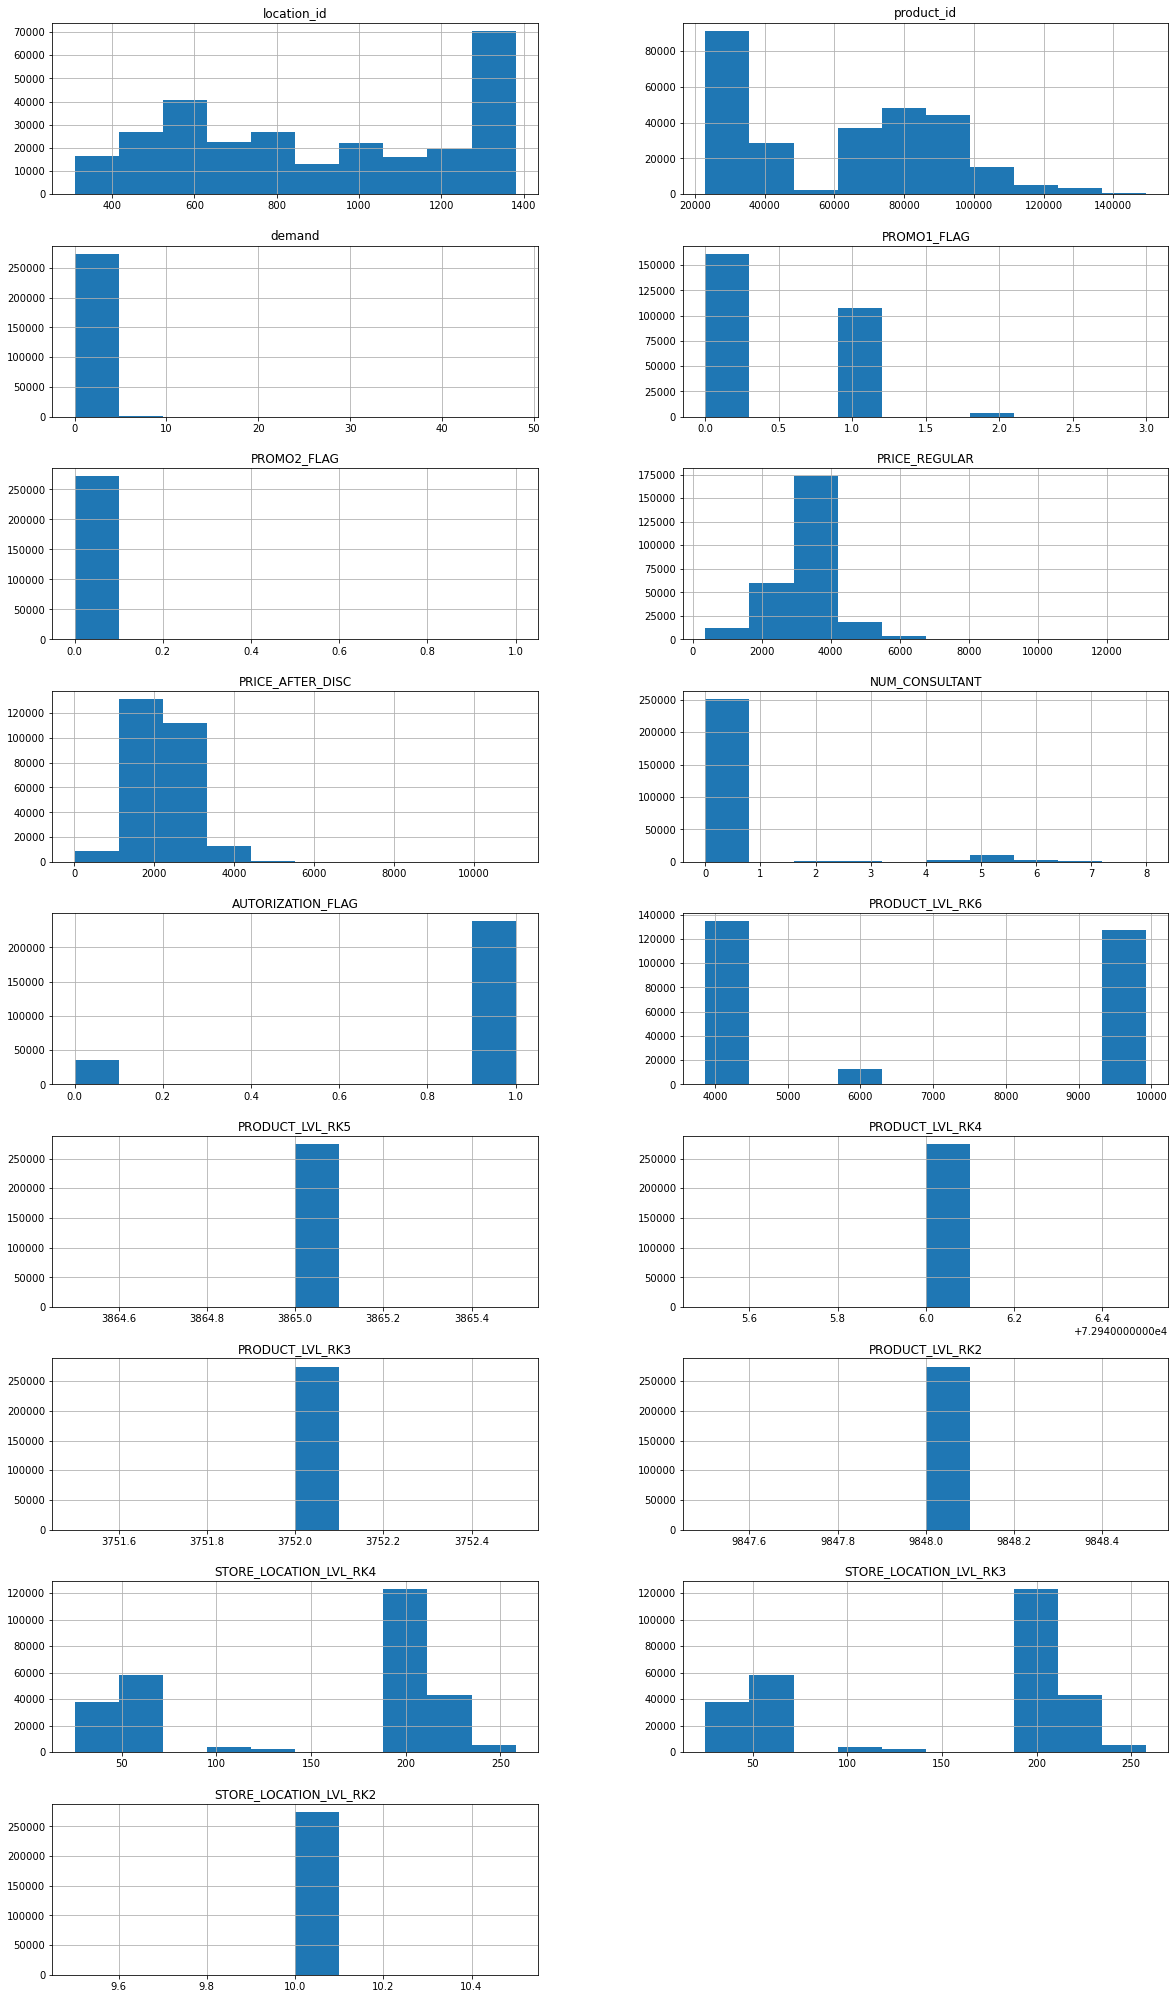

In [27]:
train.hist(figsize=(20,40), layout = (10, 2))

# Для 'PROMO1_FLAG', 'PROMO2_FLAG', 'NUM_CONSULTANT' будем использовать тактику заполнения самым частым, то есть 0
# Для 'AUTORIZATION_FLAG' - самое частое 1
# ДЛЯ 'PRICE_REGULAR', 'PRICE_AFTER_DISC' - средним значением

In [28]:
train['PROMO1_FLAG'].fillna(0, inplace=True)
train['PROMO2_FLAG'].fillna(0, inplace=True)
train['NUM_CONSULTANT'].fillna(0, inplace=True)

train['AUTORIZATION_FLAG'].fillna(1, inplace=True)

train['PRICE_REGULAR'].fillna(np.mean(train['PRICE_REGULAR']), inplace=True)
train['PRICE_AFTER_DISC'].fillna(np.mean(train['PRICE_AFTER_DISC']), inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
train.isna().sum(), test.isna().sum()

(period_dt                 0
 location_id               0
 product_id                0
 demand                    0
 PROMO1_FLAG               0
 PROMO2_FLAG               0
 PRICE_REGULAR             0
 PRICE_AFTER_DISC          0
 NUM_CONSULTANT            0
 AUTORIZATION_FLAG         0
 PRODUCT_LVL_RK6           0
 PRODUCT_LVL_RK5           0
 PRODUCT_LVL_RK4           0
 PRODUCT_LVL_RK3           0
 PRODUCT_LVL_RK2           0
 STORE_LOCATION_LVL_RK4    0
 STORE_LOCATION_LVL_RK3    0
 STORE_LOCATION_LVL_RK2    0
 dtype: int64,
 product_id                0
 location_id               0
 period_dt                 0
 PRODUCT_LVL_RK6           0
 PRODUCT_LVL_RK5           0
 PRODUCT_LVL_RK4           0
 PRODUCT_LVL_RK3           0
 PRODUCT_LVL_RK2           0
 STORE_LOCATION_LVL_RK4    0
 STORE_LOCATION_LVL_RK3    0
 STORE_LOCATION_LVL_RK2    0
 dtype: int64)

# Порядок!

# 2. Добавление фичей

# Еще на лекции нам говорили, что из одной даты модно придумать миллион дополнительных признаков, которые улучшают модель, понятное дело - перед праздниками, в выходные дни кол-во покупок будет сильно выше, так же имеет место быть периодичность итд

In [30]:
# Будем удобнее для дальнейшего использования, если мы переименуем period_dt и добавим её в конце, рядом с остальными
# временными параметрами

train['date'] = train['period_dt'].apply(pd.to_datetime)
# день в году [1,365]
train['day_of_year'] = train['date'].apply(lambda x : x.dayofyear)
# номер для в недели
train["weekday"] = train['date'].apply(lambda x : x.weekday())
# выходной день
train['is_weekend'] = train.weekday.isin([5, 6]) * 1
# номер месяца
train['month'] = train['date'].apply(lambda x : x.month)
# номер недели в году
train['week_of_year'] = train['date'].apply(lambda x : x.weekofyear)
# номер года
train['year'] = train['date'].apply(lambda x : x.year)

In [31]:
train = train.drop(columns=['period_dt'])

In [32]:
train.head()

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year
15,637.0,22939.0,0.035398,1.0,0.0,3649.0,3101.65,0.0,1.0,3876.0,...,54.0,54.0,10.0,2019-12-02,336,0,0,12,49,2019
16,317.0,22939.0,1.000000,1.0,0.0,2380.0,2380.00,0.0,1.0,3876.0,...,189.0,189.0,10.0,2017-08-28,240,0,0,8,35,2017
17,355.0,22939.0,2.000000,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-05,64,0,0,3,10,2018
18,355.0,22939.0,1.013850,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-19,78,0,0,3,12,2018
19,355.0,22939.0,0.019391,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,54.0,54.0,10.0,2018-03-26,85,0,0,3,13,2018


In [33]:
# Тоже самое для test

test['date'] = test['period_dt'].apply(pd.to_datetime)
# день в году [1,365]
test['day_of_year'] = test['date'].apply(lambda x : x.dayofyear)
# номер для в недели
test["weekday"] = test['date'].apply(lambda x : x.weekday())
# выходной день
test['is_weekend'] = test.weekday.isin([5, 6]) * 1
# номер месяца
test['month'] = test['date'].apply(lambda x : x.month)
# номер недели в году
test['week_of_year'] = test['date'].apply(lambda x : x.weekofyear)
# номер года
test['year'] = test['date'].apply(lambda x : x.year)

In [ ]:
test.head()

In [35]:
test = test.drop(columns=['period_dt'])

# Посмотрим какие значения лежат у нас в колонках

In [ ]:
categorical = train.select_dtypes(exclude = np.number)
display(categorical.describe())
display(categorical.nunique())
for i in categorical.columns:
    display(categorical[i].value_counts())

In [ ]:
numerical = train.select_dtypes(include = np.number)
display(numerical.describe())
display(numerical.nunique())
for i in numerical.columns:
    display(numerical[i].value_counts())

# 3. Добавление новых фичей

# Было бы логично добавить новые колонки, связанные с спросом. Напрашиваются значения суммарный спрос по неделям, месяцам

In [45]:
train[train['year'] == 2017][['week_of_year', 'demand']].groupby(by='week_of_year').sum()

,demand
week_of_year,
1,819.372027
2,404.733849
3,448.564997
4,520.447794
5,487.290037
6,270.386508
7,279.380732
8,668.545264
9,652.074086


In [47]:
train['demand_for_week'] = 0

years = train['year'].unique().tolist()
for year in years:
    sum_week = train[train['year'] == year][['week_of_year', 'demand']].groupby(by='week_of_year').sum()
    sum_week = dict(zip(sum_week.index.tolist(), sum_week.demand)) 
    for nu, summa in sum_week.items():
        train.loc[(train['year'] == year) & (train['week_of_year'] == key), 'demand_for_week'] = summa

In [49]:
train.head()

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,PRODUCT_LVL_RK6,...,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year,demand_for_week,demand_for_month
15,637.0,22939.0,0.035398,1.0,0.0,3649.0,3101.65,0.0,1.0,3876.0,...,10.0,2019-12-02,336,0,0,12,49,2019,1495.063113,0
16,317.0,22939.0,1.000000,1.0,0.0,2380.0,2380.00,0.0,1.0,3876.0,...,10.0,2017-08-28,240,0,0,8,35,2017,431.871682,0
17,355.0,22939.0,2.000000,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,10.0,2018-03-05,64,0,0,3,10,2018,1485.358971,0
18,355.0,22939.0,1.013850,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,10.0,2018-03-19,78,0,0,3,12,2018,351.542542,0
19,355.0,22939.0,0.019391,0.0,0.0,3549.0,2306.85,0.0,1.0,3876.0,...,10.0,2018-03-26,85,0,0,3,13,2018,543.031571,0


In [53]:
train[train['year'] == 2017][['month', 'demand']].groupby(by='month').sum()

,demand
month,
1,2680.408704
2,1870.386590
3,1722.464839
4,1404.081114
5,1752.440523
6,1566.316015
7,2459.510262
8,1666.267115
9,2350.418251


In [60]:
train['demand_for_month'] = 0

for year in years:
    sum_month = train[train['year'] == year][['month', 'demand']].groupby(by='month').sum()
    sum_month = dict(zip(sum_month.index.tolist(), sum_month.demand)) 
    for number_month, summa in sum_month.items():
        train.loc[(train['year'] == year) & (train['month'] == number_month), 'demand_for_month'] = summa

# 4. Построим немного графиков!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Спрос с течением времени')

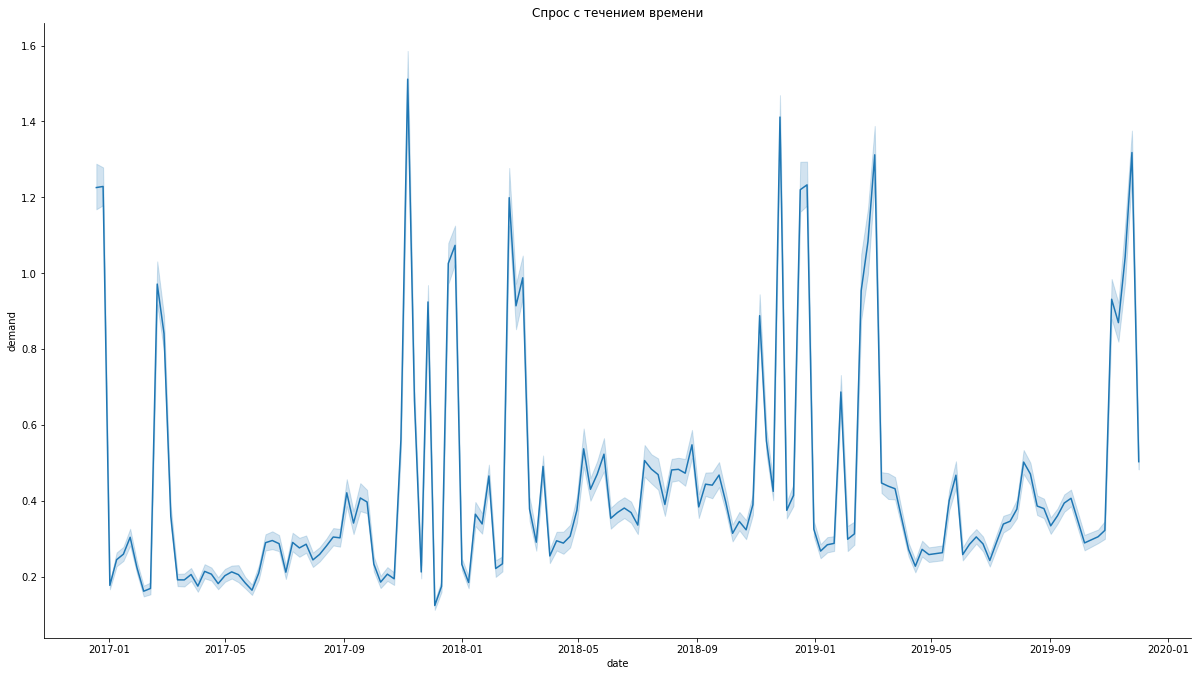

In [41]:
g = sns.relplot(data=train, x='date', y='demand', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Спрос с течением времени')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cуммарный спрос по неделям')

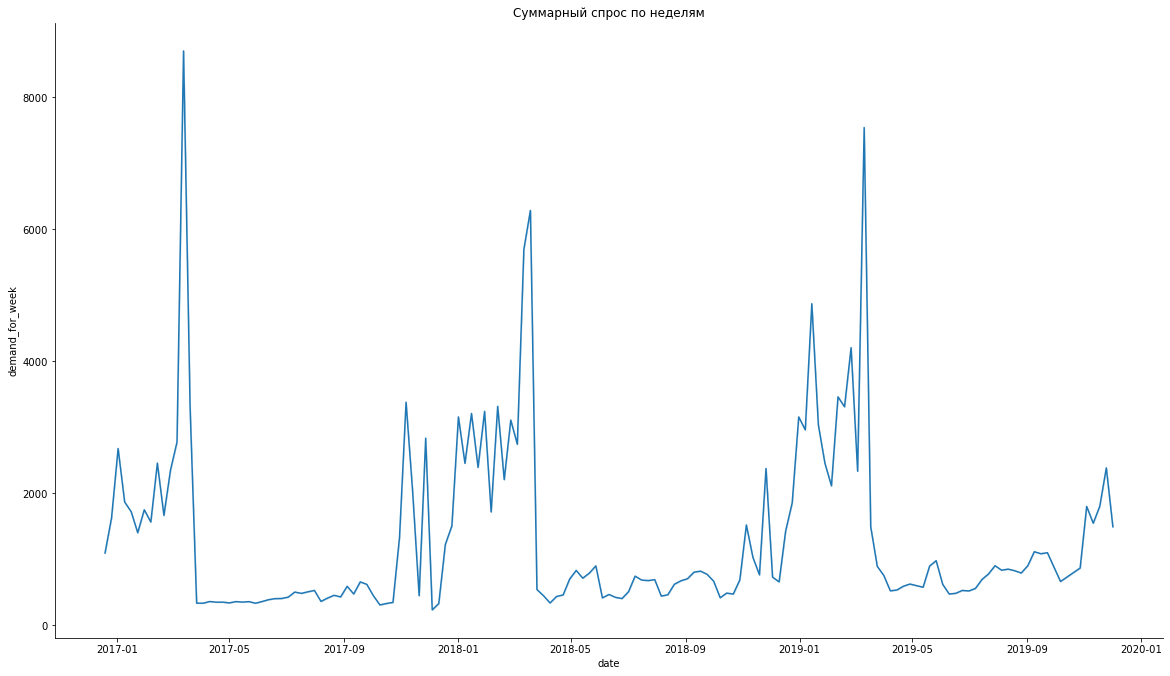

In [58]:
g = sns.relplot(data=train, x='date', y='demand_for_week', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Cуммарный спрос по неделям')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Cуммарный спрос по месяцам')

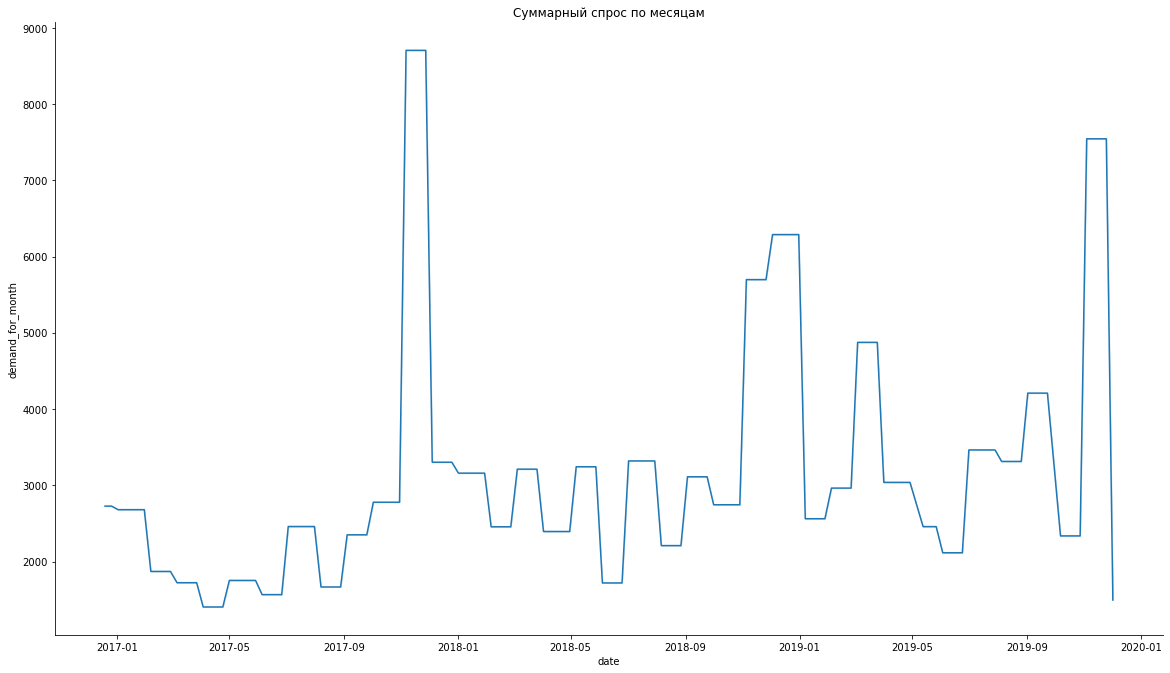

In [61]:
g = sns.relplot(data=train, x='date', y='demand_for_month', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('Cуммарный спрос по месяцам')

# По графикам очень видно, что спрос - величина периодичная, особенно хотелось бы обратить внимание на пики
# Напрашивается ввести новую фичу - пики спроса

In [64]:
train['demand_for_week'].describe(), train['demand_for_month'].describe()

(count    274471.000000
 mean       1395.107255
 std        1397.203133
 min         235.771733
 25%         505.868710
 50%         801.155836
 75%        1805.091444
 max        8704.570263
 Name: demand_for_week, dtype: float64,
 count    274471.000000
 mean       3309.777385
 std        1709.188449
 min        1404.081114
 25%        2350.418251
 50%        2778.011246
 75%        3319.351122
 max        8704.570263
 Name: demand_for_month, dtype: float64)

# Будем интерпритировать пики, как спрос выше среднего

In [66]:
test.head()

,product_id,location_id,PRODUCT_LVL_RK6,PRODUCT_LVL_RK5,PRODUCT_LVL_RK4,PRODUCT_LVL_RK3,PRODUCT_LVL_RK2,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,date,day_of_year,weekday,is_weekend,month,week_of_year,year
0,22939,1162,3876,3865,72946,3752,9848,189,189,10,2019-12-30,364,0,0,12,1,2019
1,23162,1162,9912,3865,72946,3752,9848,189,189,10,2019-12-30,364,0,0,12,1,2019
2,23163,1162,9912,3865,72946,3752,9848,189,189,10,2019-12-16,350,0,0,12,51,2019
3,23632,798,9912,3865,72946,3752,9848,203,203,10,2019-12-23,357,0,0,12,52,2019
4,23633,1347,9912,3865,72946,3752,9848,189,189,10,2019-12-30,364,0,0,12,1,2019


In [ ]:
train['peak_weeks'] = train['demand_for_week'].apply(lambda x: 1 if x > 1395 else 0)

In [ ]:
train['peak_months'] = train['demand_for_month'].apply(lambda x: 1 if x > 3309 else 0)

In [ ]:
test['peak_weeks'] = 1
test['peak_months'] = 1

In [ ]:
train[['location_id', 'demand']].groupby(by='location_id').mean().sort_values(by='demand')

In [68]:
mean_loc_demand = train[['location_id', 'demand']].groupby(by='location_id').mean().sort_values(by='demand')

# 5. Регуляризация

In [ ]:
def regular_type(x):
    if x >= 0.7:
        return 7
    elif x >= 0.5:
        return 5
    return 2

In [ ]:
mean_loc_demand['type'] = mean_loc_demand['demand'].apply(regular_type)
regs = dict(zip(mean_loc_demand.index.tolist(), mean_loc_demand['type'].tolist()))

In [ ]:
train['regular_type'] = train['location_id'].apply(lambda x: regs[x] if x in regs else 0)
test['regular_type'] = test['location_id'].apply(lambda x: regs[x] if x in regs else 0)